In [3]:
import numpy as np
import pandas as pd
import re
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, precision_recall_curve,average_precision_score
from sklearn.metrics import RocCurveDisplay
from matrix_completion import svt_solve, nuclear_norm_solve, biased_mf_solve
from BNNR import *

from numpy import interp
import seaborn as sn

data_path = r"../my_data/snoRNA_disease/"

In [127]:
np.__version__
# pd.__version__
python

'1.19.1'

## 计算疾病相似性

270    C536494
756    C564570
779    C562730
Name: MeSH ID, dtype: object
['D008175' 'D020786' 'D013274' 'D008103' 'D006528' 'D015179' 'D014901'
 'D011471' 'D012516' 'D001943' 'D005909' 'D005910' 'D021441' 'D002289'
 'D010051' 'D015470' 'D007154' 'D014376' 'D015473' 'D006333' 'D007889'
 'D011218' 'D000230' 'D055752' 'D000077195' 'D015535' 'D020031']
********calculating !!!********
D008175 Lung Neoplasms
D008175 Lung Neoplasms
similarity: 1.0
D008175 Lung Neoplasms
D020786 Hemangioma, Cavernous, Central Nervous System
similarity: 0.0349531240901415
D008175 Lung Neoplasms
D013274 Stomach Neoplasms
similarity: 0.14102936196971894
D008175 Lung Neoplasms
D008103 Liver Cirrhosis
similarity: 0.0
D008175 Lung Neoplasms
D006528 Carcinoma, Hepatocellular
similarity: 0.12483007396465538
D008175 Lung Neoplasms
D015179 Colorectal Neoplasms
similarity: 0.10570874349631078
D008175 Lung Neoplasms
D014901 West Nile Fever
similarity: 0.0
D008175 Lung Neoplasms
D011471 Prostatic Neoplasms
similarity: 0.1

similarity: 0.0
D014901 West Nile Fever
D000077195 Squamous Cell Carcinoma of Head and Neck
similarity: 0.0
D014901 West Nile Fever
D015535 Arthritis, Psoriatic
similarity: 0.0
D014901 West Nile Fever
D020031 Epstein-Barr Virus Infections
similarity: 0.13322872731614155
D011471 Prostatic Neoplasms
D008175 Lung Neoplasms
similarity: 0.14102936196971894
D011471 Prostatic Neoplasms
D020786 Hemangioma, Cavernous, Central Nervous System
similarity: 0.03395576275472852
D011471 Prostatic Neoplasms
D013274 Stomach Neoplasms
similarity: 0.13541255428345833
D011471 Prostatic Neoplasms
D008103 Liver Cirrhosis
similarity: 0.0
D011471 Prostatic Neoplasms
D006528 Carcinoma, Hepatocellular
similarity: 0.12040928004295168
D011471 Prostatic Neoplasms
D015179 Colorectal Neoplasms
similarity: 0.10197862838554499
D011471 Prostatic Neoplasms
D014901 West Nile Fever
similarity: 0.0
D011471 Prostatic Neoplasms
D011471 Prostatic Neoplasms
similarity: 1.0
D011471 Prostatic Neoplasms
D012516 Osteosarcoma
simila

similarity: 0.12630957732392067
D021441 Carcinoma, Pancreatic Ductal
D005910 Glioma
similarity: 0.1724802852387146
D021441 Carcinoma, Pancreatic Ductal
D021441 Carcinoma, Pancreatic Ductal
similarity: 1.0000000000000002
D021441 Carcinoma, Pancreatic Ductal
D002289 Carcinoma, Non-Small-Cell Lung
similarity: 0.07773192716298358
D021441 Carcinoma, Pancreatic Ductal
D010051 Ovarian Neoplasms
similarity: 0.24805435543085474
D021441 Carcinoma, Pancreatic Ductal
D015470 Leukemia, Myeloid, Acute
similarity: 0.10829777048979965
D021441 Carcinoma, Pancreatic Ductal
D007154 Immune System Diseases
similarity: 0.0
D021441 Carcinoma, Pancreatic Ductal
D014376 Tuberculosis
similarity: 0.0
D021441 Carcinoma, Pancreatic Ductal
D015473 Leukemia, Promyelocytic, Acute
similarity: 0.08895825009487932
D021441 Carcinoma, Pancreatic Ductal
D006333 Heart Failure
similarity: 0.0
D021441 Carcinoma, Pancreatic Ductal
D007889 Leiomyoma
similarity: 0.10829777048979965
D021441 Carcinoma, Pancreatic Ductal
D011218 Pr

D015473 Leukemia, Promyelocytic, Acute
D020786 Hemangioma, Cavernous, Central Nervous System
similarity: 0.07661056841824711
D015473 Leukemia, Promyelocytic, Acute
D013274 Stomach Neoplasms
similarity: 0.05632051793295958
D015473 Leukemia, Promyelocytic, Acute
D008103 Liver Cirrhosis
similarity: 0.0
D015473 Leukemia, Promyelocytic, Acute
D006528 Carcinoma, Hepatocellular
similarity: 0.10677049217763153
D015473 Leukemia, Promyelocytic, Acute
D015179 Colorectal Neoplasms
similarity: 0.04023007765001004
D015473 Leukemia, Promyelocytic, Acute
D014901 West Nile Fever
similarity: 0.0
D015473 Leukemia, Promyelocytic, Acute
D011471 Prostatic Neoplasms
similarity: 0.05632051793295958
D015473 Leukemia, Promyelocytic, Acute
D012516 Osteosarcoma
similarity: 0.1435734697513278
D015473 Leukemia, Promyelocytic, Acute
D001943 Breast Neoplasms
similarity: 0.0987474809316089
D015473 Leukemia, Promyelocytic, Acute
D005909 Glioblastoma
similarity: 0.1055147258405995
D015473 Leukemia, Promyelocytic, Acute


D000077195 Squamous Cell Carcinoma of Head and Neck
D013274 Stomach Neoplasms
similarity: 0.16442953020134227
D000077195 Squamous Cell Carcinoma of Head and Neck
D008103 Liver Cirrhosis
similarity: 0.0
D000077195 Squamous Cell Carcinoma of Head and Neck
D006528 Carcinoma, Hepatocellular
similarity: 0.3678048176101928
D000077195 Squamous Cell Carcinoma of Head and Neck
D015179 Colorectal Neoplasms
similarity: 0.12768752629786725
D000077195 Squamous Cell Carcinoma of Head and Neck
D014901 West Nile Fever
similarity: 0.0
D000077195 Squamous Cell Carcinoma of Head and Neck
D011471 Prostatic Neoplasms
similarity: 0.16442953020134227
D000077195 Squamous Cell Carcinoma of Head and Neck
D012516 Osteosarcoma
similarity: 0.14102936196971894
D000077195 Squamous Cell Carcinoma of Head and Neck
D001943 Breast Neoplasms
similarity: 0.2519585009527842
D000077195 Squamous Cell Carcinoma of Head and Neck
D005909 Glioblastoma
similarity: 0.18283464668066712
D000077195 Squamous Cell Carcinoma of Head and

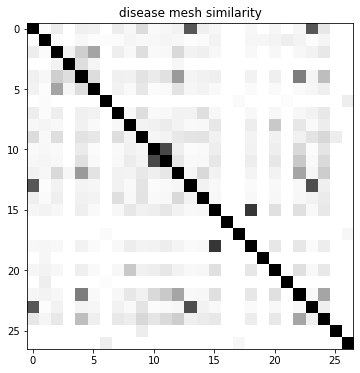

In [84]:
with open(data_path + r"mesh_by_id_dict.bin", "rb") as f:
    mesh_by_id_dict = pickle.load(f)

data = pd.read_excel(data_path  + r"snoRNA.xlsx")
mesh_id = data["MeSH ID"].dropna()
print( mesh_id[mesh_id.str.contains('C')] )

mesh_id = mesh_id[mesh_id.str.contains('D')].unique()

disease_rna_relationship = pd.read_csv(data_path+r"map_out.csv", header=None)
disease_index_list = disease_rna_relationship.iloc[:, 1].unique()

mesh_id = np.array(list(filter(lambda x: x in disease_index_list, mesh_id)))

print(mesh_id)


print("*"*8+"calculating !!!"+"*"*8)
mesh_helper = MeshTreeHelper(mesh_path=data_path+r"mesh_for_Li.bin")

disease_sim_graph_np = calculate_disease_simlarity(disease_mesh_id=mesh_id, 
                                                   mesh_by_id_dict=mesh_by_id_dict, 
                                                   mesh_helper=mesh_helper, 
                                                   weight=0.7)
disease_sim_graph_df = pd.DataFrame(disease_sim_graph_np, index=mesh_id, columns=mesh_id)
disease_sim_graph_df.head(10)

# displaying disease_similarity
plt.figure(figsize=(6,6))
plt.title("disease mesh similarity")
plt.imshow(disease_sim_graph_df, cmap="Greys")
plt.savefig(data_path+r"images/disease_corelation.svg")

In [85]:
disease_sim_graph_df.to_csv(data_path+"disease_sim_graph_filtered.csv")

In [80]:
a = [1,2,3,4,56,89]
b = [1,2,56]
list(filter(lambda x: x in b, a))

[1, 2, 56]

In [7]:
## 这个可以处理2021年的mesh文本数据

file = open(data_path + r"d2021.bin", "rb")
mesh_text_list = file.read().decode().split("*NEWRECORD")[1:]

unique_mesh_id_regex = re.compile(r"UI = (\w*)\n")
mesh_tree_id_regex = re.compile(r"MN = (.*)\n")
mesh_name_regex = re.compile(r"MH = (.*)\n")

mesh_by_id_dict = {}

for i in mesh_text_list:
    mesh_id = unique_mesh_id_regex.findall(i)[0]
    mesh_tree_id = mesh_tree_id_regex.findall(i)
    mesh_name = mesh_name_regex.findall(i)[0]
    
    mesh_by_id_dict[mesh_id] = {}
    mesh_by_id_dict[mesh_id]["mesh_tree_id"] = mesh_tree_id
    mesh_by_id_dict[mesh_id]["mesh_name"] = mesh_name

with open(data_path + r"mesh_by_id_dict.bin", "wb") as f:
    pickle.dump(mesh_by_id_dict, f)
    

# 这个模块可以用来生成mesh_nam;mesh_tree_number\n的文本文件，为李世毫师兄代码所需要
mesh_for_Li = ""
mesh_id_list = mesh_by_id_dict.keys()
for mesh_id in mesh_id_list:
    mesh_tree_list = mesh_by_id_dict[mesh_id]['mesh_tree_id']
    mesh_name_list = mesh_by_id_dict[mesh_id]['mesh_name']
    for tree_id in mesh_tree_list:
        mesh_for_Li += mesh_name_list + ";" + tree_id + "\n"

with open(data_path + r"mesh_for_Li.bin", "w") as f:
    f.write(mesh_for_Li)

## 计算序列相似性

In [11]:
#Tanimoto系数
def tanimoto_coeffcient(x1, x2):
    return (x1 * x2).sum() / ((x1 * x1).sum() + (x2 * x2).sum() - (x1 * x2).sum())
    

feature_dir_path = data_path+r"generated_features/"
seq_simlarity_list = []
feature_list = []
for feature in os.listdir(feature_dir_path)[4:]:
    try:
        
        feature_path = feature_dir_path + feature
        print(feature_path)

        feature_df = pd.read_csv(feature_path, header=None, index_col=0)

        seq_simlarity = np.zeros((feature_df.shape[0],feature_df.shape[0]))

        for i in range(feature_df.shape[0]):
            for j in range(feature_df.shape[0]):
                seq_simlarity[i,j] = tanimoto_coeffcient(feature_df.iloc[i,:], feature_df.iloc[j,:])

        seq_simlarity_df = pd.DataFrame(seq_simlarity, index=feature_df.index, columns=feature_df.index)
        seq_simlarity_list.append(seq_simlarity_df)
        feature_list.append( feature.replace(".csv", ""))
        seq_simlarity_df.to_csv(data_path + "seq_sim/" + feature.replace(".csv", "_similarity.csv"))
    except:
        print("wrong!!!")
 

../my_data/snoRNA_disease/generated_features/NAC.csv
../my_data/snoRNA_disease/generated_features/PseEIIP.csv
../my_data/snoRNA_disease/generated_features/NCP.csv
wrong!!!
../my_data/snoRNA_disease/generated_features/binary.csv
wrong!!!
../my_data/snoRNA_disease/generated_features/TNC.csv
../my_data/snoRNA_disease/generated_features/RCKmer.csv
../my_data/snoRNA_disease/generated_features/EIIP.csv
wrong!!!
../my_data/snoRNA_disease/generated_features/snoRNA_3mer.csv
../my_data/snoRNA_disease/generated_features/ENAC.csv
wrong!!!
../my_data/snoRNA_disease/generated_features/snoRNA_2mer.csv
../my_data/snoRNA_disease/generated_features/.ipynb_checkpoints
wrong!!!
../my_data/snoRNA_disease/generated_features/ANF.csv
wrong!!!
../my_data/snoRNA_disease/generated_features/snoRNA_6mer.csv


/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


## 加载序列相似性矩阵，绘制图像

PseEIIP_similarity.csv
snoRNA_5mer_similarity.csv
CKSNAP_similarity.csv
DNC_similarity.csv
NAC_similarity.csv
snoRNA_4mer_similarity.csv
RCKmer_similarity.csv
snoRNA_3mer_similarity.csv
snoRNA_6mer_similarity.csv
TNC_similarity.csv
snoRNA_2mer_similarity.csv


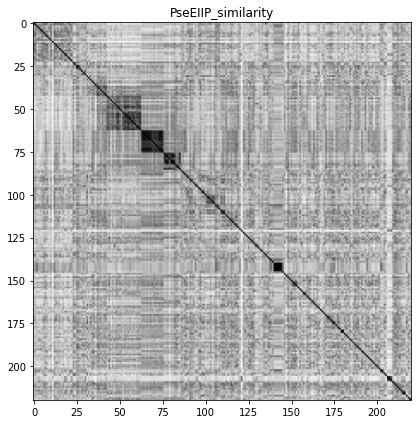

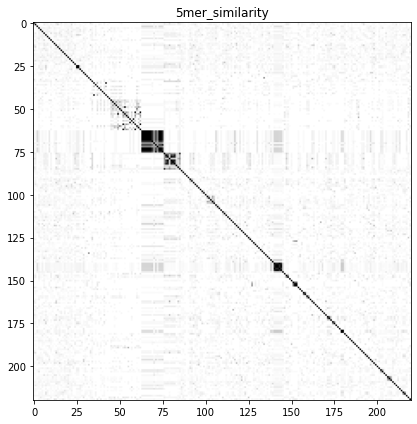

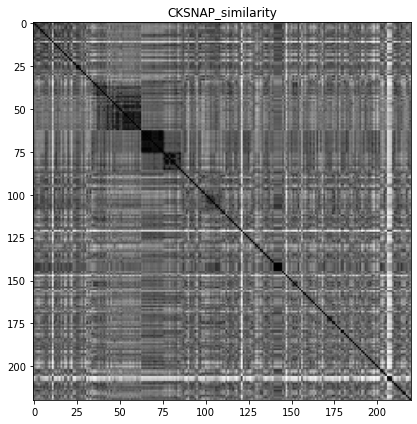

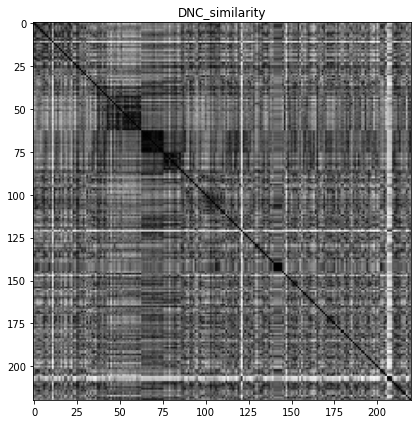

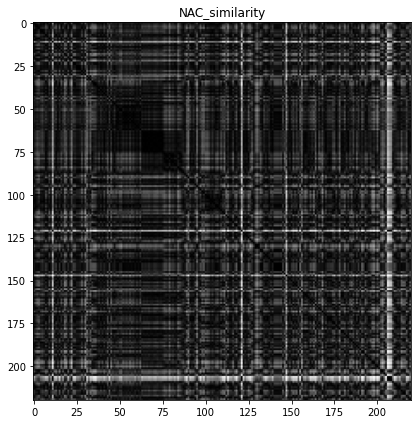

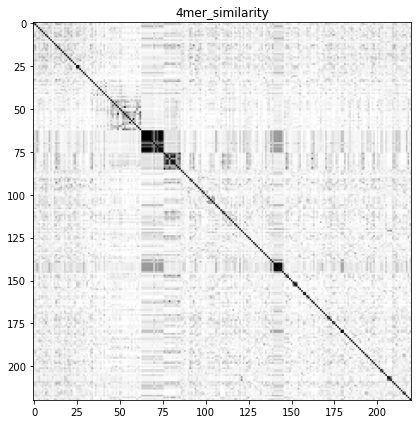

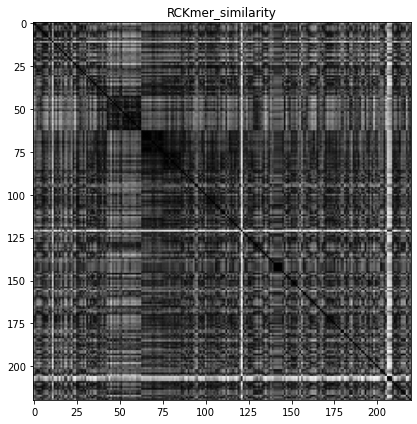

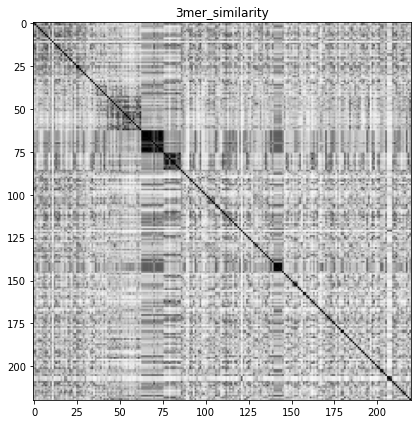

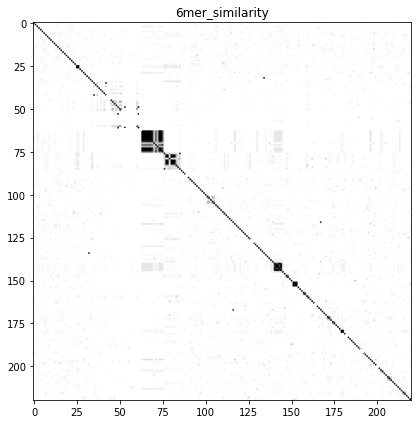

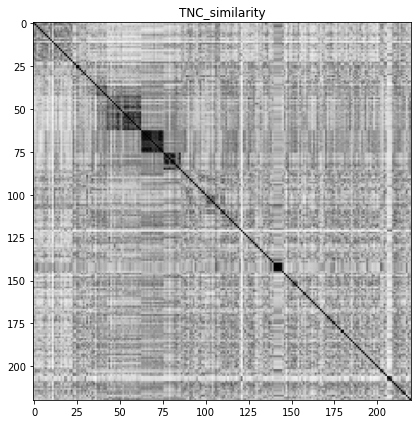

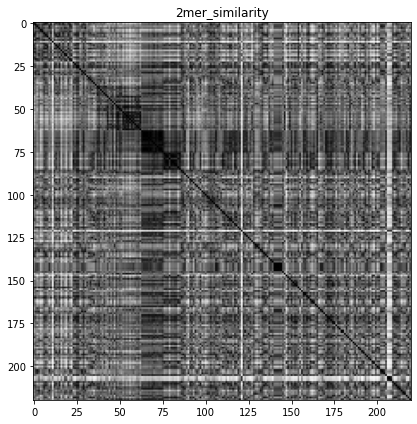

In [12]:
seq_sim_dir_path = data_path+r"seq_sim/"
seq_simlarity_list = []
feature_list = []
for seq_sim in os.listdir(seq_sim_dir_path):
    seq_sim_path = seq_sim_dir_path + seq_sim

    print(seq_sim)

    seq_simlarity_df = pd.read_csv(seq_sim_path, header=0, index_col=0)

    seq_simlarity_list.append(seq_simlarity_df)
    
    plt.figure(figsize=(6,6))
    plt.title(seq_sim.replace(".csv", "").replace("snoRNA_", ""))
    plt.imshow(seq_simlarity_df, cmap="Greys")9
    plt.tight_layout()
    plt.savefig(data_path+r"images/" + seq_sim.replace(".csv", ".svg"))

## 生成待补全的矩阵，使用3mer 以及 疾病的图的语义相似性

In [110]:
class Training_Model():
    
    def __init__(self, cv_fold = 2, test_size= 0.2, method_list= ["BNNR"], 
                 seq_simlarity_list=[], on_metric = "mean_roc_auc", 
                 fig_dir="", csv_dir="", case_list=[], case_name=[],
                 colors=["deeppink", "orange", "purple"],
                 cmap=None):
        
        self.sss = StratifiedShuffleSplit(n_splits=cv_fold, test_size = test_size, random_state=6)#1/cv_fold
        
        self.method_list = method_list
        self.seq_simlarity_list = seq_simlarity_list
        
        self.on_metric = on_metric
        self.fig_dir = fig_dir
        self.csv_dir = csv_dir
        self.case_list = case_list
        self.case_name = case_name
        self.colors = colors
        self.cmap = cmap
        
        self.lw = 2

        self.a_sim = None
        self.a_name_list = None
        self.a_num = 0
        
        self.b_sim = None
        self.b_name_list = None
        self.b_num = 0
        
        self.relationship_list_true = None
        self.relationship_list_pred = None
        
        self.relation_matrix_true = None
        self.relation_matrix_pred = None
        
        self.cv_results = []
        
        self.hyper_param = None
        self.init_hyperparameter()
        
#     def init_hyperparameter(self):
        
#         hyper_param=dict.fromkeys(self.method_list,{})
#         hyper_param={k:{} for k in self.method_list}
#         hyper_param["bnnr"]["alpha"] = np.logspace(start=-2, stop=3,num=5, base=10)
#         hyper_param["bnnr"]["beta"] = np.logspace(start=-2, stop=3,num=5, base=10)

# #         tau : singular value thresholding amount;, default to 5 * (m + n) / 2
# #         delta : step size per iteration; default to 1.2 times the undersampling ratio
#         hyper_param["svt"]["tau"] = np.logspace(start=-2, stop=3, num=5, base=10)
#         hyper_param["svt"]["delta"] = np.logspace(start=-2, stop=3, num=5, base=10)

#         # mu :hyperparameter controlling tradeoff between nuclear norm and square loss
#         hyper_param["nuclear_norm"]["mu"] = np.logspace(start=-2, stop=3,num=15, base=10)
#         hyper_param["nuclear_norm"]["null"] = np.logspace(start=-5, stop=8,num=20, base=2)
        
#         self.hyper_param = hyper_param
        
    def init_hyperparameter(self):
        
        hyper_param=dict.fromkeys(self.method_list,{})
        hyper_param={k:{} for k in self.method_list}
        
        hyper_param["BNNR"]["alpha"] =  [0.05, 0.1, 1, 10]
        hyper_param["BNNR"]["beta"] = [5, 10, 20, 30]

#         tau : singular value thresholding amount;, default to 5 * (m + n) / 2
#         delta : step size per iteration; default to 1.2 times the undersampling ratio
        hyper_param["SVT"]["tau"] = [20, 200, 750, 1000] 
        hyper_param["SVT"]["delta"] = [0.4, 0.9, 1.4, 1.8]

        # mu :hyperparameter controlling tradeoff between nuclear norm and square loss
        hyper_param["Candès and Recht's method"]["mu"] = [1, 5, 10, 15]
        hyper_param["Candès and Recht's method"]["null"] = np.logspace(start=-5, stop=8,num=20, base=2)
        
        self.hyper_param = hyper_param
        
#     def init_hyperparameter(self):
        
#         hyper_param=dict.fromkeys(self.method_list,{})
#         hyper_param={k:{} for k in self.method_list}
#         hyper_param["bnnr"]["alpha"] =[1] 
#         hyper_param["bnnr"]["beta"] = [10]

# #         tau : singular value thresholding amount;, default to 5 * (m + n) / 2
# #         delta : step size per iteration; default to 1.2 times the undersampling ratio
#         hyper_param["svt"]["tau"] = [1] 
#         hyper_param["svt"]["delta"] = [10]

#         # mu :hyperparameter controlling tradeoff between nuclear norm and square loss
#         hyper_param["nuclear_norm"]["mu"] = [1]
#         hyper_param["nuclear_norm"]["null"] = np.logspace(start=-5, stop=8,num=20, base=2)
        
#         self.hyper_param = hyper_param
        

            
    def matrix_to_list_final(self, matrix, true_y):
        
        row_number = self.a_num
        row_name = self.a_name_list

        col_number = self.b_num
        col_name = self.b_name_list

        result_list = pd.DataFrame(columns=['Disease', 'RNA', 'Relation', "True_y"], index=range(row_number*col_number))

        for row_index in range(row_number):
            for col_index in range(col_number):
                list_index = row_index*col_number + col_index
                result_list.iloc[list_index, 0] = row_name[row_index]
                result_list.iloc[list_index, 1] = col_name[col_index]
                result_list.iloc[list_index, 2] = matrix.iloc[row_index, col_index]
        result_list.iloc[:, 3] = true_y

        return result_list
    
    def matrix_to_list(self, matrix):
        
        result_list_np = matrix.values.reshape(-1,)

        return result_list_np
    
    
    def list_to_matrix(self, list_array_np):
        
        row_list = self.a_name_list
        col_list = self.b_name_list

        col_number = self.b_num

        result_matrix = pd.DataFrame(list_array_np.reshape(self.a_num, col_number), columns=col_list, index=row_list)

        return result_matrix
    
    def matrix_compose(self, relation_matrix):

        temp = pd.concat((self.a_sim, relation_matrix), axis=1)
        temp1 = pd.concat((relation_matrix.transpose(), self.b_sim), axis=1)
        need_complete_matrix = pd.concat((temp,temp1), axis=0).astype(np.float)
        
        
        return need_complete_matrix
    
    
    def decompose_matrix(self, matrix):
        relation_matrix_1 = matrix.iloc[0 : self.a_num, self.a_num:]
        relation_matrix_2 = matrix.iloc[self.a_num : , 0 : self.a_num].transpose()
        relation_matrix_pred = (relation_matrix_1 + relation_matrix_2) / 2
        
        return relation_matrix_pred
        
        
    def generate_mask(self, relation_matrix):
        
        a_mask = pd.DataFrame(np.ones((self.a_num, self.a_num)),
                                    index=self.a_name_list,
                                    columns=self.a_name_list)
        
        b_mask = pd.DataFrame(np.ones((self.b_num, self.b_num)),
                                index=self.b_name_list,
                                columns=self.b_name_list)
        
        temp_mask = pd.concat((a_mask, relation_matrix), axis=1)
        temp1_mask = pd.concat((relation_matrix.transpose(), b_mask), axis=1)
        matrix_mask = pd.concat((temp_mask,temp1_mask), axis=0).astype(np.float)
               
        
        return matrix_mask
    
    def find_optimal_cutoff(self, TPR, FPR, threshold):
        y = TPR - FPR
            
        Youden_index = np.argmax(y)  # Only the first occurrence is returned.
        optimal_threshold = threshold[Youden_index]
        point = [FPR[Youden_index], TPR[Youden_index]]
        
        return optimal_threshold, point
    
    def get_fpr_tpr_youdan(self, y_true, y_score):
        
        fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
        optimal_threshold, _ = self.find_optimal_cutoff(tpr, fpr, threshold)
        re_fpr = np.linspace(0, 1, 100)
        tpr = interp(re_fpr, fpr, tpr)
        fpr = re_fpr
        roc_auc = roc_auc_score(y_true, y_score)
        
        precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
        re_recall = np.linspace(0, 1, 100)
        precision = interp(re_recall, recall[::-1], precision[::-1])
        recall = re_recall
        prc_average_precision_score = average_precision_score(y_true, y_score)

        y_pred = (np.array(y_score) >= optimal_threshold).astype(int)
        report_result = classification_report(y_true, y_pred, output_dict=True)
        
        return fpr, tpr, optimal_threshold, roc_auc, report_result, precision, recall, prc_average_precision_score

    
    def performance_calculation(self, cv_result):
        
        fpr_list = []
        tpr_list = []
        threshold_list = []
        roc_auc_list = []
        
        precision_list = []
        recall_list = [] 
        prc_average_precision_score_list = []
        
        precision_0 = []
        precision_1 = []
        recall_0 = []
        recall_1 = []
        f1_score_0 = []
        f1_score_1 = []
        accuracy = []
        macro_precision = []
        macro_recall = []
        macro_f1_score = []
        weighted_precision = []
        weighted_recall = []
        weighted_f1_score = []

        for y_true, y_score in zip(cv_result["true_label"], cv_result["pred_proba"]):

            fpr, tpr, threshold, roc_auc, report_result ,precision, recall, prc_average_precision_score = self.get_fpr_tpr_youdan(y_true, y_score)
            fpr_list.append(fpr)
            tpr_list.append(tpr)
            threshold_list.append(threshold)
            roc_auc_list.append(roc_auc)

            precision_list.append(precision)
            recall_list.append(recall)
            prc_average_precision_score_list.append(prc_average_precision_score)
            
            precision_0.append(report_result["0"]["precision"])
            precision_1.append(report_result["1"]["precision"])
            recall_0.append(report_result["0"]["recall"])
            recall_1.append(report_result["1"]["recall"])
            f1_score_0.append(report_result["0"]["f1-score"])
            f1_score_1.append(report_result["1"]["f1-score"])
            accuracy.append(report_result["accuracy"])
            macro_precision.append(report_result["macro avg"]["precision"])
            macro_recall.append(report_result["macro avg"]["recall"])
            macro_f1_score.append(report_result["macro avg"]["f1-score"])
            weighted_precision.append(report_result["weighted avg"]["precision"])
            weighted_recall.append(report_result["weighted avg"]["recall"])
            weighted_f1_score.append(report_result["weighted avg"]["f1-score"])
            
        mean_fpr = np.mean([fpr for fpr in fpr_list], axis=0)
        mean_tpr = np.mean([tpr for tpr in tpr_list], axis=0)
        std_tpr = np.std([tpr for tpr in tpr_list], axis=0)
        
        mean_precision = np.mean([precision for precision in precision_list], axis=0)
        mean_recall = np.mean([recall for recall in recall_list], axis=0)
        mean_prc_average_precision_score = auc(mean_recall, mean_precision)
        std_precision = np.std([precision for precision in precision_list], axis=0)
        std_average_precision_score = np.std([average_precision_score for average_precision_score in prc_average_precision_score_list])
        precisions_upper = np.minimum(mean_precision + std_precision, 1)
        precisions_lower = np.maximum(mean_precision - std_precision, 0)

        
        metrics_dic = dict(
        mean_fpr = mean_fpr, 
        mean_tpr = mean_tpr,
        mean_roc_auc = auc(mean_fpr, mean_tpr.reshape(mean_tpr.shape[0],)), 
        std_tpr = std_tpr, 
        std_auc = np.std([auc for auc in roc_auc_list]), 
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1), 
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0), 
        threshold_list = threshold_list,
            
        mean_precision = mean_precision,
        mean_recall = mean_recall,
        mean_prc_average_precision_score = mean_prc_average_precision_score,
        std_precision = std_precision,
        std_average_precision_score = std_average_precision_score,
        precisions_upper = precisions_upper,
        precisions_lower = precisions_lower,

        precision_0_mean = np.mean(precision_0), 
        precision_1_mean = np.mean(precision_1), 
        recall_0_mean = np.mean(recall_0), 
        recall_1_mean = np.mean(recall_1), 
        f1_score_0_mean = np.mean(f1_score_0), 
        f1_score_1_mean = np.mean(f1_score_1), 
        accuracy_mean = np.mean(accuracy), 
        macro_precision_mean = np.mean(macro_precision), 
        macro_recall_mean = np.mean(macro_recall), 
        macro_f1_score_mean = np.mean(macro_f1_score), 
        weighted_precision_mean = np.mean(weighted_precision), 
        weighted_recall_mean = np.mean(weighted_recall), 
        weighted_f1_score_mean = np.mean(weighted_f1_score),
        )
        
        return metrics_dic


        

        
    def matrix_completion(self, matrix, mask, method, param_a, param_b):
        
        if method == "BNNR":
            completed_matrix, iterations = bnnr(matrix.to_numpy(), mask.to_numpy(), alpha=param_a, beta=param_b)
        elif method == "SVT":
            completed_matrix = svt_solve(matrix.to_numpy(), mask.to_numpy(), algorithm='randomized', tau=param_a, delta=param_b)
        elif method == "Candès and Recht's method":
            completed_matrix = nuclear_norm_solve(matrix.to_numpy(), mask.to_numpy(), mu=param_a)
        

        completed_matrix = pd.DataFrame(completed_matrix, 
                                        index=matrix.index, 
                                        columns=matrix.columns)

        return completed_matrix
        
        
    def train_on_method_hyperparameters(self,a_sim, b_sim, relation_matrix, method, seq_sim_str, param_a=1, param_b=1):
        
        self.a_sim = a_sim
        self.a_name_list = self.a_sim.index
        self.a_num = len(self.a_name_list)
        
        self.b_sim = b_sim
        self.b_name_list = self.b_sim.index
        self.b_num = len(self.b_name_list)
        
        self.relation_matrix_true = relation_matrix
        self.relationship_list_true_np = self.matrix_to_list(relation_matrix)
        
        cv_result = {}
        cv_result["true_label"] = []
        cv_result["pred_proba"] = []
        
        print("param_a, param_b:", param_a, param_b)
        
        
        for train_index, test_index in self.sss.split(self.relationship_list_true_np , self.relationship_list_true_np):
            
            self.relationship_list_pred = self.relationship_list_true_np.copy()
            self.relationship_list_pred[test_index] = 0
            self.relation_matrix_pred = self.list_to_matrix(self.relationship_list_pred)
            
            composed_matrix = self.matrix_compose(self.relation_matrix_pred)
            matrix_mask = self.generate_mask(self.relation_matrix_pred)
            
            t0 = time.time()

            completed_matrix = self.matrix_completion(composed_matrix, matrix_mask, method, param_a, param_b)
#             completed_matrix = composed_matrix
            t1 = time.time()
            print("mentod: "+method, "cost time:", t1-t0)
            
            self.relation_matrix_pred = self.decompose_matrix(completed_matrix)
            self.relationship_list_pred_np = self.matrix_to_list(self.relation_matrix_pred)
            true_y = self.relationship_list_true_np.astype(np.int32)[test_index]
            pred_prob = self.relationship_list_pred_np[test_index]

            cv_result["true_label"].append(true_y)
            cv_result["pred_proba"].append(pred_prob)
            
        plt.figure(figsize=(12,12))
        plt.imshow(composed_matrix, cmap="Greys")
        plt.savefig(self.fig_dir +seq_sim_str+method+"composed_matrix.svg")
        composed_matrix.to_csv(self.csv_dir+seq_sim_str+method+r"composed_matrix.csv")
        plt.close()
            
        plt.figure(figsize=(12,12))
        plt.imshow(completed_matrix, cmap="Greys")
        plt.savefig(self.fig_dir +seq_sim_str+method+"completed_matrix.svg")
        completed_matrix.to_csv(self.csv_dir+seq_sim_str+method+r"completed_matrix.csv")
        plt.close()
            
        return self.performance_calculation(cv_result)
            
            
    def grid_parameters(self, a_sim, b_sim, relation_matrix, method, seq_sim_str):
        
        param_set = list(self.hyper_param[method].values())
        
        one_grid_result = dict(param_a=[], param_b=[], metric_value={})
        
        if method == "Candès and Recht's method":
            for param_a in param_set[0]:
                one_grid_result["param_a"].append(param_a)
                one_grid_result["param_b"].append("null")
                metric_dic = self.train_on_method_hyperparameters(a_sim, b_sim, relation_matrix, method, seq_sim_str, param_a)
                for key in metric_dic.keys():
                    if not one_grid_result["metric_value"].get(key, None):
                        one_grid_result["metric_value"][key] = []
                    one_grid_result["metric_value"][key].append(metric_dic[key])
                        
        else:
            for param_a in param_set[0]:
                for param_b in param_set[1]:
                    one_grid_result["param_a"].append(param_a)
                    one_grid_result["param_b"].append(param_b)
                    
                    metric_dic = self.train_on_method_hyperparameters(a_sim, b_sim, relation_matrix, method, seq_sim_str, param_a, param_b)
                    for key in metric_dic.keys():
                        if not one_grid_result["metric_value"].get(key, None):
                            one_grid_result["metric_value"][key] = []
                        one_grid_result["metric_value"][key].append(metric_dic[key])
        
        max_index = np.argmax(one_grid_result["metric_value"][self.on_metric])
        print("param_a", one_grid_result["param_a"][max_index])
        print("param_b", one_grid_result["param_b"][max_index])
        print("accuracy_mean", one_grid_result["metric_value"]["accuracy_mean"][max_index], max_index)
        print("threshold_list", one_grid_result["metric_value"]["threshold_list"][max_index], max_index)
        
        
        
        return one_grid_result, max_index
        
    def plot_roc_on_best_paramter(self, mean_roc_auc, std_auc,mean_tpr, 
                                  mean_fpr, tprs_lower, tprs_upper,
                                  color = 'deeppink', label=""):
    

        plt.plot(mean_fpr, mean_tpr, 
                 color=color, lw=self.lw, 
#                  linestyle=':', 
                 label=label+' (auc = {0:0.2f} $\pm$ {1:0.2f})'''.format(mean_roc_auc, std_auc)
                )
        
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, 
                         color=color, alpha=.2)
        

    def plot_method_on_same_chart(self,i):
        
        plt.figure(num=10+i, figsize=(6,6))
        
#         colors = ["deeppink", "orange", "purple"]
        
        seq_sim = self.seq_simlarity_list[i]
        seq_sim_str = seq_sim.replace(".csv", "").replace("_similarity", "").replace("snoRNA_", "")

        for j, method in enumerate(self.method_list):
                color = self.colors[j]
                on_grid_result, max_index = self.cv_results[i][j]["on_param_cv"]
                self.plot_roc_on_best_paramter(on_grid_result["metric_value"]["mean_roc_auc"][max_index],
                                               on_grid_result["metric_value"]["std_auc"][max_index],
                                               on_grid_result["metric_value"]["mean_tpr"][max_index],
                                               on_grid_result["metric_value"]["mean_fpr"][max_index],
                                               on_grid_result["metric_value"]["tprs_lower"][max_index],
                                               on_grid_result["metric_value"]["tprs_upper"][max_index],
                                               color,
                                               method+" "+seq_sim_str,
                                              )

                
        
        plt.plot([0, 1], [0, 1], 'k--', lw=self.lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("")
        plt.legend(loc="lower right", prop={"size": 9})
        plt.savefig(self.fig_dir +seq_sim_str+"averaged_cv_roc.svg", bbox_inches = "tight")
        
        
    def plot_method_on_same_chart(self, i):
        
        plt.figure(num=10+i, figsize=(6,6))
        
#         colors = ["deeppink", "orange", "purple"]
        
        seq_sim = self.seq_simlarity_list[i]
        seq_sim_str = seq_sim.replace(".csv", "").replace("_similarity", "").replace("snoRNA_", "")

        for j, method in enumerate(self.method_list):


            color = self.colors[j]
            on_grid_result, max_index = self.cv_results[i][j]["on_param_cv"]
            self.plot_roc_on_best_paramter(on_grid_result["metric_value"]["mean_roc_auc"][max_index],
                                           on_grid_result["metric_value"]["std_auc"][max_index],
                                           on_grid_result["metric_value"]["mean_tpr"][max_index],
                                           on_grid_result["metric_value"]["mean_fpr"][max_index],
                                           on_grid_result["metric_value"]["tprs_lower"][max_index],
                                           on_grid_result["metric_value"]["tprs_upper"][max_index],
                                           color,
                                           method+" ",#+seq_sim_str
                                          )

                
        
        plt.plot([0, 1], [0, 1], 'k--', lw=self.lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("")
        plt.legend(loc="lower right", prop={"size": 9})
        plt.savefig(self.fig_dir +seq_sim_str+"averaged_cv_roc.svg", bbox_inches = "tight")

        
        
    def plot_pr_on_best_paramter(self,mean_recall, mean_precision, precisions_lower,precisions_upper, 
                                 mean_prc_average_precision_score, std_average_precision_score,
                                 color = 'deeppink', label=""):
        
        plt.plot(mean_recall, mean_precision, 
                 color=color, lw=self.lw, #linestyle=':', 
                 label=label+'(aps = {0:0.2f} $\pm$ {1:0.2f})'''.format(mean_prc_average_precision_score, std_average_precision_score))
        plt.fill_between(mean_recall, precisions_lower, precisions_upper, color=color, alpha=.1)

                
    def plot_method_on_same_chart_pr(self, i):
        
        plt.figure(num=20+i, figsize=(6,6))
        
#         colors = ["deeppink", "orange", "purple"]
        
        seq_sim_str = self.seq_simlarity_list[i].replace(".csv", "").replace("_similarity", "").replace("snoRNA_", "")
         

        for j, method in enumerate(self.method_list):

            color = self.colors[j]
            on_grid_result, max_index = self.cv_results[i][j]["on_param_cv"]
            self.plot_pr_on_best_paramter(on_grid_result["metric_value"]["mean_recall"][max_index],
                                           on_grid_result["metric_value"]["mean_precision"][max_index],
                                           on_grid_result["metric_value"]["precisions_lower"][max_index],
                                           on_grid_result["metric_value"]["precisions_upper"][max_index],
                                           on_grid_result["metric_value"]["mean_prc_average_precision_score"][max_index],
                                           on_grid_result["metric_value"]["std_average_precision_score"][max_index],
                                           color,
                                           method+" ",#+seq_sim_str,
                                          )
        
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title("")
        plt.legend(loc="lower right", prop={"size": 9})
        plt.savefig(self.fig_dir +seq_sim_str+"averaged_cv_prc.svg", bbox_inches = "tight")
        
        plt.show()
            
    def save_to_metrics(self, ):
        
        result_array = []
        for i, seq_sim in enumerate(self.seq_simlarity_list):
            for j, method in enumerate(self.method_list):
                on_grid_result, max_index = self.cv_results[i][j]["on_param_cv"]
                valid_metrics = ["seq_sim", "method"]
                valid_metrics_value = [seq_sim, method]
                for metric in on_grid_result["metric_value"].keys():
                    try:
                        if len(on_grid_result["metric_value"][metric][max_index]) > 1:
                            pass
                    except:
                        valid_metrics.append(metric)
                        valid_metrics_value.append(on_grid_result["metric_value"][metric][max_index])
                if i == 0 and j==0:
                    result_array.append(valid_metrics)
                    result_array.append(valid_metrics_value)
                else:
                    result_array.append(valid_metrics_value)

        pd.DataFrame(np.array(result_array)).to_csv(self.csv_dir+r"final_matrics.csv")
        
    def refit(self,a_sim, b_sim, relation_matrix, method, seq_sim_str, param_a=1, param_b=1):
        self.a_sim = a_sim
        self.a_name_list = self.a_sim.index
        self.a_num = len(self.a_name_list)
        self.b_sim = b_sim
        self.b_name_list = self.b_sim.index
        self.b_num = len(self.b_name_list)
        
        relationship_list_true_np = self.matrix_to_list(relation_matrix)
        composed_matrix = self.matrix_compose(relation_matrix)
        matrix_mask = self.generate_mask(relation_matrix)
        
        print(composed_matrix.shape, matrix_mask.shape)

        t0 = time.time()
        completed_matrix = self.matrix_completion(composed_matrix, matrix_mask, method, param_a, param_b)
        t1 = time.time()
        print("refit mentod: "+method, "cost time:", t1-t0)
        
        relation_matrix_pred = self.decompose_matrix(completed_matrix)
        relationship_list_pred = self.matrix_to_list_final(relation_matrix_pred, relationship_list_true_np)
        
        plt.figure(figsize=(12,12))
        plt.imshow(completed_matrix, cmap="Greys")
        plt.savefig(self.fig_dir +seq_sim_str+method+"completed_matrix_final.svg")
        
        plt.figure(figsize=(12,12))
        plt.imshow(composed_matrix, cmap="Greys")
        plt.savefig(self.fig_dir +seq_sim_str+method+"composed_matrix_final.svg")
        
        completed_matrix.to_csv(self.csv_dir+seq_sim_str+method+r"_compeleted_matrix_final.csv")
        relationship_list_pred.to_csv(self.csv_dir+seq_sim_str+method+r"_compeleted_list_final.csv")
        
    def refit_for_case(self,a_sim, b_sim, relation_matrix, method, seq_sim_str, param_a=1, param_b=1):
        self.a_sim = a_sim
        self.a_name_list = self.a_sim.index
        self.a_num = len(self.a_name_list)
        self.b_sim = b_sim
        self.b_name_list = self.b_sim.index
        self.b_num = len(self.b_name_list)
        
        for i, disease_index in enumerate(self.case_list):
            
            # keep the original y label
            relationship_list_true_np = self.matrix_to_list(relation_matrix)
            
            # this is for predicting the masked disease
            relation_matrix_pred = relation_matrix.copy()
            relation_matrix_pred.loc[disease_index, :] = 0

            composed_matrix = self.matrix_compose(relation_matrix_pred)
            matrix_mask = self.generate_mask(relation_matrix_pred)

            t0 = time.time()
            completed_matrix = self.matrix_completion(composed_matrix, matrix_mask, method, param_a, param_b)
            t1 = time.time()
            print("refit mentod: "+method, "cost time:", t1-t0)

            relation_matrix_pred = self.decompose_matrix(completed_matrix)
            relationship_list_pred = self.matrix_to_list_final(relation_matrix_pred, relationship_list_true_np)
            
            plt.figure(figsize=(12,12))
            plt.imshow(completed_matrix, cmap="Greys")
            plt.savefig(self.fig_dir +seq_sim_str+method+"_case_{}_".format(self.case_name[i])+"completed_matrix.svg")
            plt.close()
            plt.figure(figsize=(12,12))
            plt.imshow(composed_matrix, cmap="Greys")
            plt.savefig(self.fig_dir +seq_sim_str+method+"_case_{}_".format(self.case_name[i])+"composed_matrix.svg")
            plt.close()
            
            

#             completed_matrix.to_csv(self.csv_dir+seq_sim_str+method+"_case_{}".format(self.case_name[i])+r"_compeleted_matrix_final_case.csv")

            flag_index = relationship_list_pred.loc[:, "Disease"] == disease_index
            relationship_list_pred.loc[flag_index, :].to_csv(self.csv_dir+seq_sim_str+method+"_case_{}".format(self.case_name[i])+r"_compeleted_list_final_case.csv")
    
    def visual_hyperparamters(self, ):
        
        for cv_results in self.cv_results:
            for dic_result in cv_results:
                print(dic_result['seq_sim'], dic_result['method'])
                seq_sim_str, method_str = dic_result['seq_sim'], dic_result['method']
                
                if dic_result['method'] == "Candès and Recht's method":
                    auc = dic_result['on_param_cv'][0]['metric_value']["mean_roc_auc"]
                    specificity = dic_result['on_param_cv'][0]['metric_value']["recall_0_mean"]
                    sensitivity = dic_result['on_param_cv'][0]['metric_value']["recall_1_mean"]
                    accuracy = dic_result['on_param_cv'][0]['metric_value']["accuracy_mean"]
                    df_tem = pd.DataFrame(np.array([auc, specificity, sensitivity, accuracy]), 
                                          index = ["auc", "specificity", "sensitivity", "accuracy"],
                                          columns = list(map(lambda x: round(x, 2),dic_result['on_param_cv'][0]['param_a'])))
                    fig, ax = plt.subplots(1, 1)

                    sn.heatmap(df_tem, annot=True,cmap=self.cmap, vmin=0.8, vmax=1, ax=ax, cbar=False)
                    plt.savefig(self.fig_dir +seq_sim_str+"_"+method_str+"_metrics_visual.svg", bbox_inches = "tight")
        
                    continue
                
                print(dic_result['on_param_cv'][0].keys())
                max_index = dic_result['on_param_cv'][1]
                auc = dic_result['on_param_cv'][0]['metric_value']["mean_roc_auc"]
                specificity = dic_result['on_param_cv'][0]['metric_value']["recall_0_mean"]
                sensitivity = dic_result['on_param_cv'][0]['metric_value']["recall_1_mean"]
                accuracy = dic_result['on_param_cv'][0]['metric_value']["accuracy_mean"]

                plot_metrics = [auc, specificity, sensitivity, accuracy]
                metric_str = ["AUC", "Specificity", "Sensitivity", "Accuracy"]

                fig, axs = plt.subplots(2, 2)
                axs = axs.reshape(-1,)
                len_a = len(self.hyper_param["BNNR"]["alpha"])
                len_b = len(self.hyper_param["BNNR"]["beta"])
                
                for i, plot_metric in enumerate(plot_metrics):
                    df_tem = pd.DataFrame(np.array(plot_metric).reshape(len_a,-1), 
                                          index = list(map(lambda x: round(x, 2),dic_result['on_param_cv'][0]['param_a'][::len_b])),
                                          columns = list(map(lambda x: round(x, 2),dic_result['on_param_cv'][0]['param_b'][:len_b])))


                    sn.heatmap(df_tem, annot=True, cmap=self.cmap, vmin=0.8, vmax=1, ax=axs[i], cbar=False)
                    
                    axs[i].set_title(metric_str[i])
                    if i == 0:
                        axs[i].get_xaxis().set_visible(False)
                    elif i ==1:
                        axs[i].set_axis_off()
                    elif i == 3:
                        axs[i].get_yaxis().set_visible(False)
                        
                plt.savefig(self.fig_dir +seq_sim_str+"_"+method_str+"_metrics_visual.svg", bbox_inches = "tight")
        
        
    def run(self, relationship_matrix_path, disease_sim_path, seq_sim_dir_path):
        
        relationship_matrix_df = pd.read_csv(relationship_matrix_path, header=0, index_col=0)
        
        relationship_matrix_df.columns = relationship_matrix_df.columns.map(int)
        
        disease_sim_graph_df = pd.read_csv(disease_sim_path, header=0, index_col=0) 

        
        for i, seq_sim in enumerate(self.seq_simlarity_list):
            seq_sim_str = seq_sim.replace(".csv", "").replace("_similarity", "").replace("snoRNA_", "")
            print(seq_sim_str)
            seq_sim_path = seq_sim_dir_path + seq_sim
            seq_simlarity_df = pd.read_csv(seq_sim_path, header=0, index_col=0)
            
            seq_simlarity_df.index = seq_simlarity_df.index.map(int)
            seq_simlarity_df.columns = seq_simlarity_df.columns.map(int)

            a_sim = disease_sim_graph_df
            b_sim = seq_simlarity_df
            relation_matrix = relationship_matrix_df
            
            self.cv_results.append([])
            
            for j, method in enumerate(self.method_list):
                
                self.cv_results[i].append([])
                self.cv_results[i][j] = dict(seq_sim=seq_sim_str, method=method, on_param_cv=None)
                print("method!!!" + method)
                self.cv_results[i][j]["on_param_cv"] = self.grid_parameters(a_sim, b_sim, relation_matrix, method, seq_sim_str)
                
            self.plot_method_on_same_chart(i)
            self.plot_method_on_same_chart_pr(i)
            
        self.save_to_metrics()
        self.visual_hyperparamters()
        plt.show()
        
        # refit process
        for i, seq_sim in enumerate(self.seq_simlarity_list):
            seq_sim_str = seq_sim.replace(".csv", "").replace("_similarity", "").replace("snoRNA_", "")
            print(seq_sim_str)
            seq_sim_path = seq_sim_dir_path + seq_sim
            seq_simlarity_df = pd.read_csv(seq_sim_path, header=0, index_col=0)
            
            seq_simlarity_df.index = seq_simlarity_df.index.map(int)
            seq_simlarity_df.columns = seq_simlarity_df.columns.map(int)
            
            a_sim = disease_sim_graph_df
            b_sim = seq_simlarity_df
            relation_matrix = relationship_matrix_df

            for j, method in enumerate(self.method_list):
#                 if method == "svt":
#                     continue
                on_grid_result, max_index = self.cv_results[i][j]["on_param_cv"]
                param_a = on_grid_result["param_a"][max_index]
                param_b = on_grid_result["param_b"][max_index]
                print("refit phase")
                self.refit(a_sim, b_sim, relation_matrix, method, seq_sim_str, param_a, param_b)
                print("refit for case")
                self.refit_for_case(a_sim, b_sim, relation_matrix, method, seq_sim_str, param_a, param_b)


4mer
method!!!BNNR
param_a, param_b: 0.05 5
mentod: BNNR cost time: 3.7288336753845215
mentod: BNNR cost time: 3.7594192028045654
mentod: BNNR cost time: 3.730422019958496
mentod: BNNR cost time: 3.7142529487609863
mentod: BNNR cost time: 3.841555118560791
param_a, param_b: 0.05 10
mentod: BNNR cost time: 3.397233247756958
mentod: BNNR cost time: 3.374493360519409
mentod: BNNR cost time: 3.5295751094818115
mentod: BNNR cost time: 3.3260717391967773
mentod: BNNR cost time: 3.538627862930298
param_a, param_b: 0.05 20
mentod: BNNR cost time: 3.94211745262146
mentod: BNNR cost time: 4.1621973514556885
mentod: BNNR cost time: 4.246784925460815
mentod: BNNR cost time: 3.8617637157440186
mentod: BNNR cost time: 4.190514802932739
param_a, param_b: 0.05 30
mentod: BNNR cost time: 4.232357740402222
mentod: BNNR cost time: 4.114717483520508
mentod: BNNR cost time: 4.305102825164795
mentod: BNNR cost time: 4.276507377624512
mentod: BNNR cost time: 4.305243492126465
param_a, param_b: 0.1 5
mentod: 

mentod: Candès and Recht's method cost time: 18.7675564289093
param_a, param_b: 5 1
mentod: Candès and Recht's method cost time: 16.76815390586853
mentod: Candès and Recht's method cost time: 17.61620569229126
mentod: Candès and Recht's method cost time: 17.275091409683228
mentod: Candès and Recht's method cost time: 17.35407781600952
mentod: Candès and Recht's method cost time: 17.09834861755371
param_a, param_b: 10 1
mentod: Candès and Recht's method cost time: 21.700212001800537
mentod: Candès and Recht's method cost time: 22.171510219573975
mentod: Candès and Recht's method cost time: 22.554706811904907
mentod: Candès and Recht's method cost time: 21.894092559814453
mentod: Candès and Recht's method cost time: 22.119145154953003
param_a, param_b: 15 1
mentod: Candès and Recht's method cost time: 22.599270820617676
mentod: Candès and Recht's method cost time: 21.674396753311157
mentod: Candès and Recht's method cost time: 21.761411428451538
mentod: Candès and Recht's method cost tim

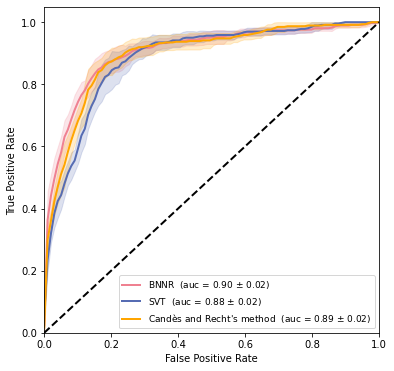

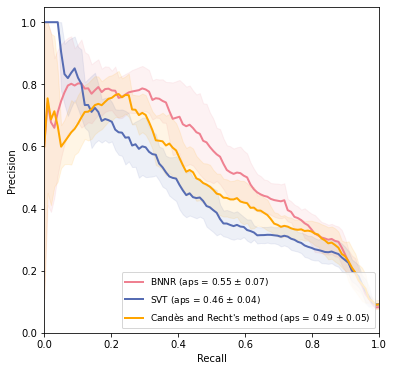

4mer BNNR
dict_keys(['param_a', 'param_b', 'metric_value'])
4mer SVT
dict_keys(['param_a', 'param_b', 'metric_value'])
4mer Candès and Recht's method


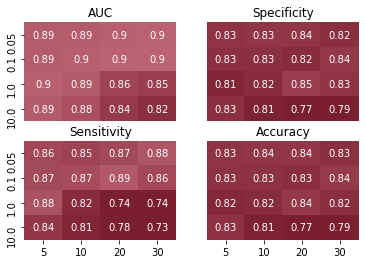

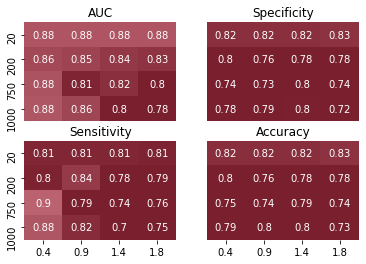

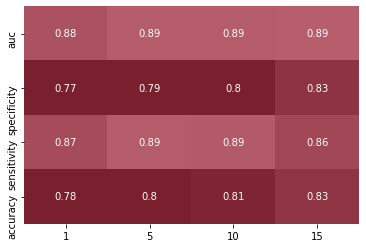

4mer
refit phase
(247, 247) (247, 247)
refit mentod: BNNR cost time: 3.6135473251342773
refit for case
refit mentod: BNNR cost time: 3.863685131072998
refit mentod: BNNR cost time: 3.648341417312622
refit mentod: BNNR cost time: 3.257025718688965
refit mentod: BNNR cost time: 3.371596097946167
refit mentod: BNNR cost time: 3.549154758453369
refit mentod: BNNR cost time: 3.4740705490112305
refit mentod: BNNR cost time: 3.4179773330688477
refit mentod: BNNR cost time: 3.8389554023742676
refit mentod: BNNR cost time: 3.4970035552978516
refit mentod: BNNR cost time: 3.5820963382720947
refit mentod: BNNR cost time: 3.9524106979370117
refit mentod: BNNR cost time: 3.547145366668701
refit mentod: BNNR cost time: 3.955562114715576
refit phase
(247, 247) (247, 247)
refit mentod: SVT cost time: 7.776841163635254
refit for case
refit mentod: SVT cost time: 7.704300403594971
refit mentod: SVT cost time: 8.092098474502563
refit mentod: SVT cost time: 7.662333011627197
refit mentod: SVT cost time: 7

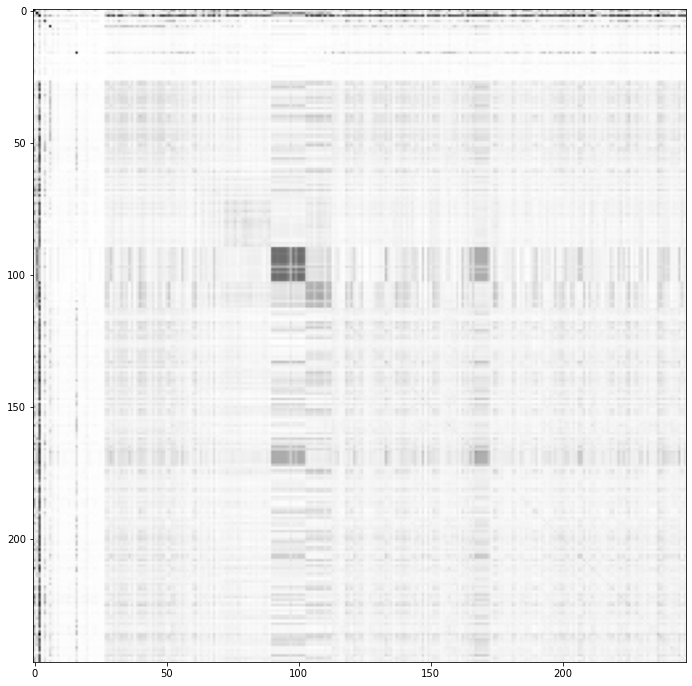

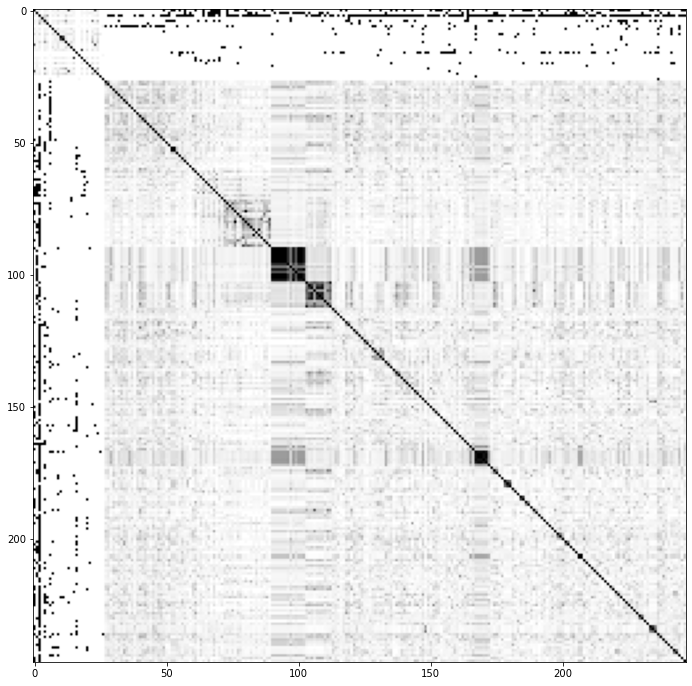

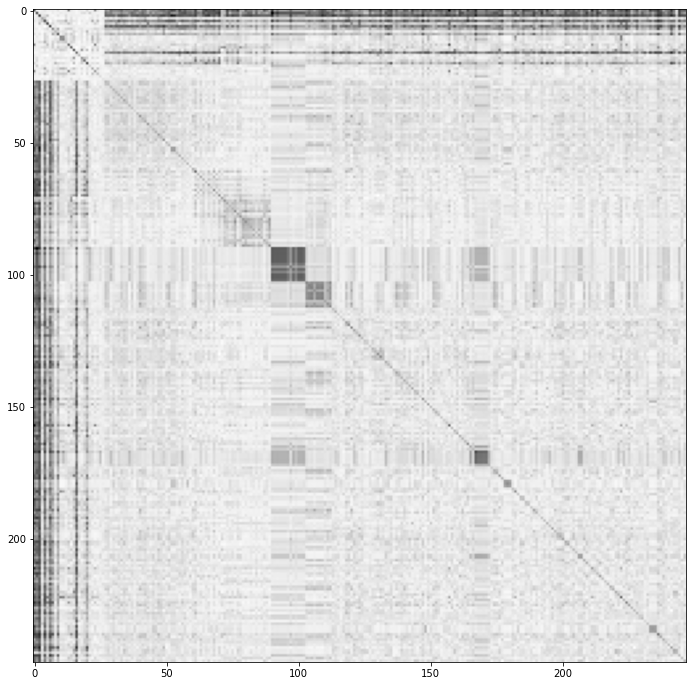

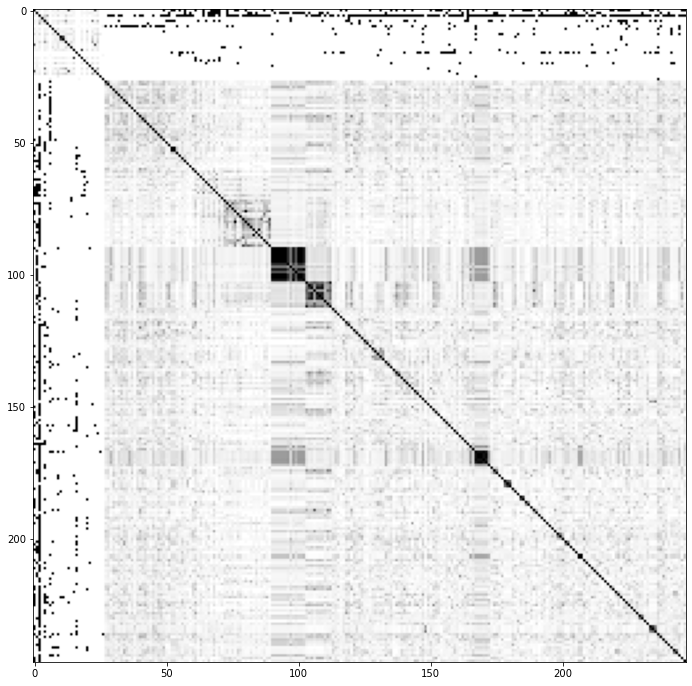

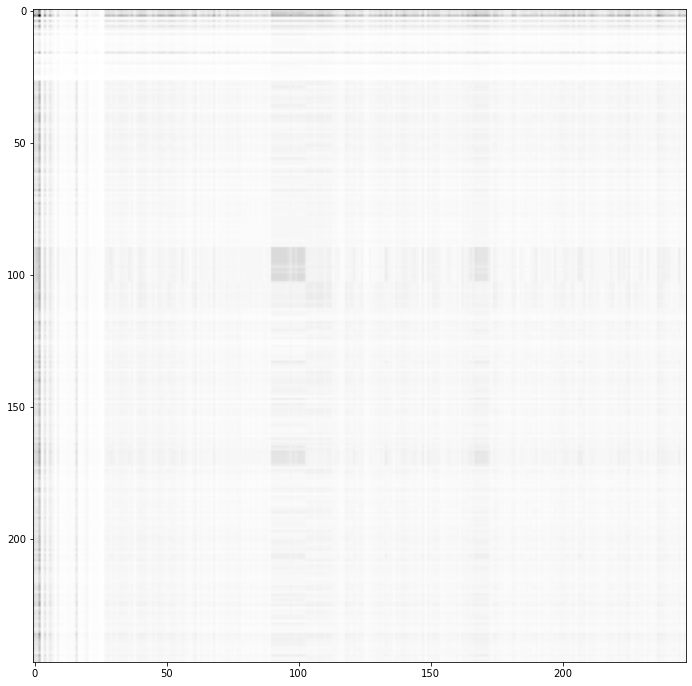

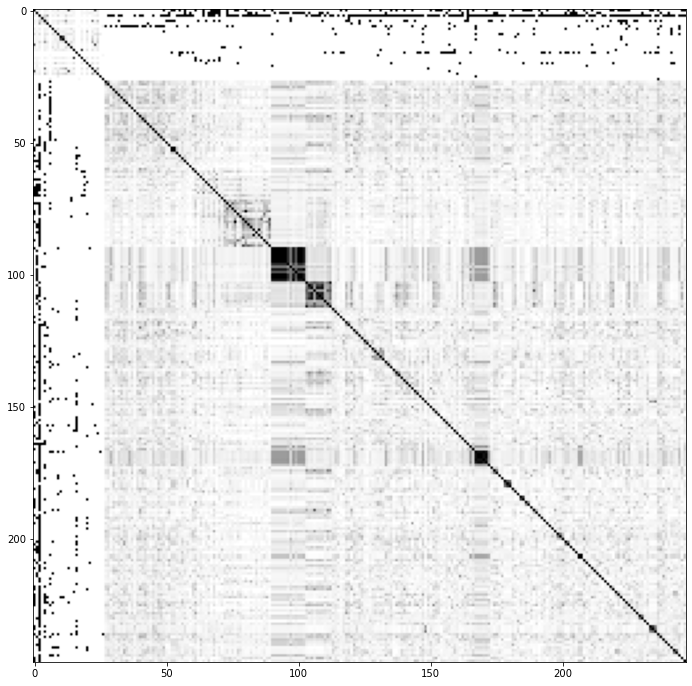

In [111]:
seq_simlarity_list = ["snoRNA_4mer_similarity.csv"]#, "snoRNA_2mer_similarity.csv", , "RCKmer_similarity.csv",, "NAC_similarity.csv"
method_list = ["BNNR", "SVT", "Candès and Recht's method"]#
relationship_matrix_path = data_path + "relationship_matrix_filtered.csv"
seq_sim_dir_path = data_path + r"seq_sim/"
disease_sim_path = data_path + "disease_sim_graph_filtered.csv"

case_list = ["D013274", "D008175", "D020786", "D006528", "D007154", "D014901", "D011471", "D001943", "D007889",
             "D015179", "D006333", "D010051", "D015470"]
case_name = ["166_Stomach_Neoplasms", "57_Lung_Neoplasms", "44_Hemangioma_Cavernous_Central_Nervous_System", 
             "39_Carcinoma_Hepatocellular", "39_Immune_System_Diseases", "35_West_Nile_Fever", "13_Prostatic_Neoplasms", 
             "12_Breast_Neoplasms", "11_Leiomyoma",
             "6_Colorectal Neoplasms", "5_Heart Failure", "4_Ovarian Neoplasms", "4_Leukemia, Myeloid, Acute"
            ]
# #"snoRNA_3mer_similarity.csv", 

def get_color(tup):
    return tuple(map(lambda x: x / 255, tup))

pink = get_color((239,129,145))
blue = get_color((86,108,179))
colors = [pink, blue, "orange"]

color1 = get_color((122,31,46))
color2 = get_color((250,163,178))
cmap = LinearSegmentedColormap.from_list('my_color', [color1, color2], N=100)

train_model = Training_Model(cv_fold=5,
                             test_size=0.2,
                             method_list=method_list,
                             seq_simlarity_list=seq_simlarity_list,
                             fig_dir = data_path+r"images/",
                             csv_dir = data_path+r"csv_result/",
                             case_list = case_list,
                             case_name = case_name,
                             colors = colors,
                             cmap = cmap)

train_model.run( relationship_matrix_path, disease_sim_path, seq_sim_dir_path)

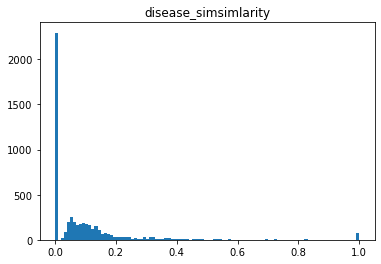

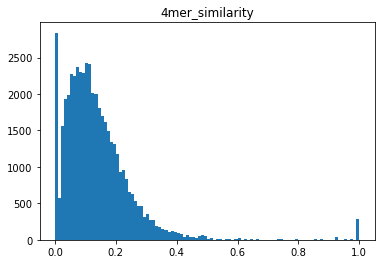

In [100]:
def matrix_to_list(matrix):

    result_list_np = matrix.values.reshape(-1,)

    return pd.DataFrame(result_list_np)


def show_normal(data, sim_str):
    data = matrix_to_list(data)
    data.iloc[:].hist(grid=False, bins=100)
    plt.title(sim_str)
    plt.savefig(data_path+r"images/" +sim_str+"_similairty_distribution.svg", bbox_inches = "tight")


disease_sim_path = data_path + "disease_sim_graph.csv"
disease_sim_graph_df = pd.read_csv(disease_sim_path, header=0, index_col=0)

seq_sim_dir_path = data_path+r"seq_sim/"
seq_sim = "snoRNA_4mer_similarity.csv" ##"NAC_similarity.csv"#"snoRNA_3mer_similarity.csv"
seq_sim_path = seq_sim_dir_path + seq_sim
seq_simlarity_df = pd.read_csv(seq_sim_path, header=0, index_col=0)
seq_simlarity_df.index = seq_simlarity_df.index.map(int)
seq_simlarity_df.columns = seq_simlarity_df.columns.map(int)



show_normal(disease_sim_graph_df, sim_str="disease_simsimlarity")
show_normal(seq_simlarity_df, sim_str=seq_sim.replace(".csv", "").replace("snoRNA_", ""))


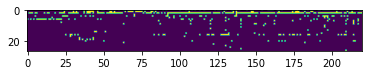

In [113]:
# 生成 disease*snorna大小的关系矩阵
disease_rna_relationship = pd.read_csv(data_path+r"map_out.csv", header=None)



disease_sim_path = data_path + "disease_sim_graph_filtered.csv"
disease_sim_graph_df = pd.read_csv(disease_sim_path, header=0, index_col=0)
seq_sim_path = data_path + r"seq_sim/snoRNA_4mer_similarity.csv"
seq_simlarity_df = pd.read_csv(seq_sim_path, header=0, index_col=0)


relation_matrix = np.zeros((len(disease_sim_graph_df.index), len(seq_simlarity_df.index)))
for i,disease_index  in enumerate(disease_sim_graph_df.index):
    for j, seq_index in enumerate(seq_simlarity_df.index):
        sign = ((disease_rna_relationship.iloc[:, 1] == disease_index) & (disease_rna_relationship.iloc[:, 0] == seq_index)).sum()
        relation_matrix[i,j] = sign
        
        
relationship_matrix = pd.DataFrame(relation_matrix, index=disease_sim_graph_df.index, columns=seq_simlarity_df.index)
# relationship_matrix.to_csv(data_path + "relationship_matrix_filtered.csv")



# relation_matrix = np.zeros((len(disease_index_list), len(sno_rna_index_list)))
# for i,disease_index  in enumerate(disease_index_list):
#     for j, seq_index in enumerate(sno_rna_index_list):
#         sign = ((disease_rna_relationship.iloc[:, 1] == disease_index) & (disease_rna_relationship.iloc[:, 0] == seq_index)).sum()
#         relation_matrix[i,j] = sign
# relationship_matrix = pd.DataFrame(relation_matrix, index=disease_index_list, columns=sno_rna_index_list)

# relationship_matrix.to_csv(data_path + "relationship_matrix_filtered.csv")

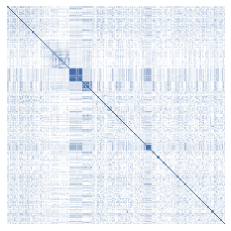

In [128]:
color1 = get_color((175,186,220)) #blue pink disease
color1 = get_color((68,109,169)) # 轮廓 蓝 dark 
color2 = get_color((251,223,227)) #red pink snorna
color2 = get_color((172,63,66))

color3 = get_color((86,123,177)) #yellow relation
color_base = get_color((255,255,255)) #whitw

cmap_disease = LinearSegmentedColormap.from_list('my_color', [color_base, color2], N=50)
cmap_snoRNA = LinearSegmentedColormap.from_list('my_color', [color_base, color1], N=50)
cmap_relation = LinearSegmentedColormap.from_list('my_color', [color_base, color3], N=50)

relationship_matrix_path = data_path + "relationship_matrix_filtered.csv"
seq_sim_dir_path = data_path + r"seq_sim/"
disease_sim_path = data_path + "disease_sim_graph_filtered.csv"
seq_sim_path = seq_sim_dir_path + "snoRNA_4mer_similarity.csv"

relationship_matrix_df = pd.read_csv(relationship_matrix_path, header=0, index_col=0)
disease_sim_graph_df = pd.read_csv(disease_sim_path, header=0, index_col=0)
seq_simlarity_df = pd.read_csv(seq_sim_path, header=0, index_col=0)

plt.imshow(relationship_matrix, cmap=cmap_relation)
plt.axis('off')
plt.savefig(data_path+r"images/relation.svg", bbox_inches='tight')

plt.imshow(disease_sim_graph_df, cmap=cmap_disease)
plt.axis('off')
plt.savefig(data_path+r"images/disease_sim.svg", bbox_inches='tight')

plt.imshow(seq_simlarity_df, cmap=cmap_snoRNA)
plt.axis('off')
plt.savefig(data_path+r"images/seq_sim.svg", bbox_inches='tight')

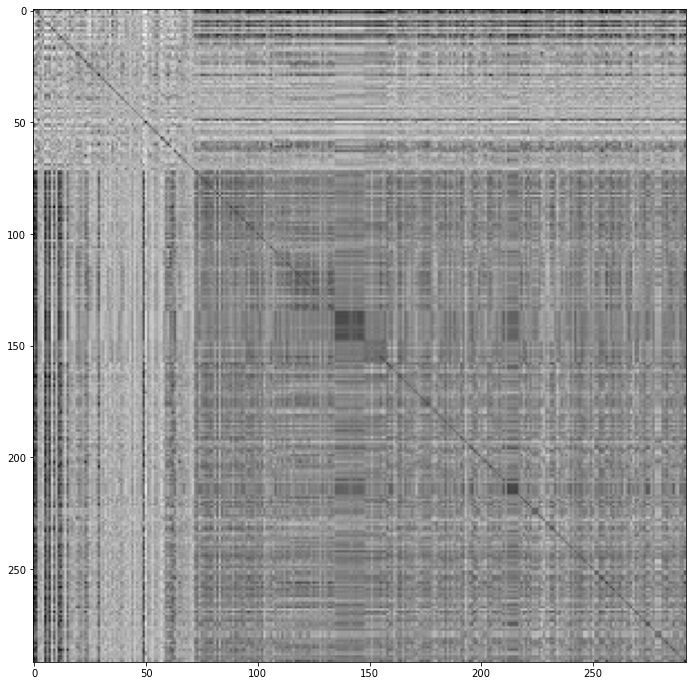

In [88]:
completed_matrix = svt_solve(need_complete_matrix.to_numpy(), need_complete_matrix_mask.to_numpy(), algorithm='randomized')
# completed_matrix = biased_mf_solve(need_complete_matrix.to_numpy(), need_complete_matrix_mask.to_numpy(), k=80, mu = 0.01)

# A, mask, k, mu
completed_matrix = pd.DataFrame(completed_matrix, 
                                index=need_complete_matrix.index, 
                                columns=need_complete_matrix.columns)

plt.figure(figsize=(12,12))
plt.imshow(completed_matrix, cmap="Greys")
plt.savefig(data_path+r"images/completed_matrix.svg")

completed_matrix.to_csv(data_path+r"completed_matrix.csv")

# 生成 disease*snorna大小的关系矩阵
disease_rna_relationship = pd.read_csv(data_path+r"map_out.csv", header=None)
relation_matrix = np.zeros((len(disease_sim_graph_df.index), len(seq_simlarity_df.index)))
for i,disease_index  in enumerate(disease_sim_graph_df.index):
    for j, seq_index in enumerate(seq_simlarity_df.index):
        sign = ((disease_rna_relationship.iloc[:, 1] == disease_index) & (disease_rna_relationship.iloc[:, 0] == seq_index)).sum()
        relation_matrix[i,j] = sign
relationship_matrix = pd.DataFrame(relation_matrix, index=disease_sim_graph_df.index, columns=seq_simlarity_df.index)



hyper_param={k:{} for k in method_list}
hyper_param["bnnr"]["alpha"] = np.logspace(start=-2, stop=3,num=20, base=10)
hyper_param["bnnr"]["beta"] = np.logspace(start=-2, stop=3,num=20, base=10)

# tau : singular value thresholding amount;, default to 5 * (m + n) / 2
# delta : step size per iteration; default to 1.2 times the undersampling ratio
hyper_param["svt_solve"]["tau"] = np.logspace(start=-2, stop=3,num=20, base=10)
hyper_param["svt_solve"]["delta"] = np.logspace(start=-2, stop=3,num=20, base=10)

# mu :hyperparameter controlling tradeoff between nuclear norm and square loss
hyper_param["nuclear_norm_solve"]["mu"] = np.logspace(start=-5, stop=8,num=20, base=2)

for para_a in list(hyper_param["bnnr"].values())[0]:
    for para_b in list(hyper_param["bnnr"].values())[1]:
        print(para_a)

4mer bnnr
dict_keys(['param_a', 'param_b', 'metric_value'])
4mer svt
dict_keys(['param_a', 'param_b', 'metric_value'])
4mer nuclear_norm


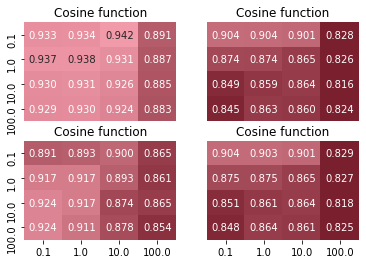

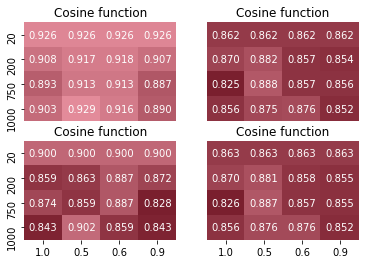

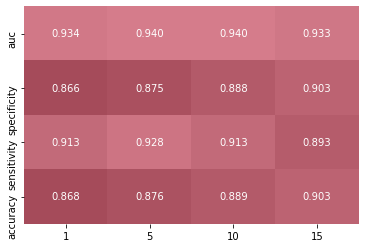

In [70]:
len(train_model.cv_results)

def visual_hyperparamters(cv_results, cmap):
        
        for cv_results in cv_results:
            for dic_result in cv_results:
                print(dic_result['seq_sim'], dic_result['method'])
                seq_sim_str, method_str = dic_result['seq_sim'], dic_result['method']
                
                if dic_result['method'] == "nuclear_norm":
                    auc = dic_result['on_param_cv'][0]['metric_value']["mean_roc_auc"]
                    specificity = dic_result['on_param_cv'][0]['metric_value']["recall_0_mean"]
                    sensitivity = dic_result['on_param_cv'][0]['metric_value']["recall_1_mean"]
                    accuracy = dic_result['on_param_cv'][0]['metric_value']["accuracy_mean"]
                    df_tem = pd.DataFrame(np.array([auc, specificity, sensitivity, accuracy]), 
                                          index = ["auc", "specificity", "sensitivity", "accuracy"],
                                          columns = list(map(lambda x: round(x, 2),dic_result['on_param_cv'][0]['param_a'])))
                    fig, ax = plt.subplots(1, 1)
#                     axs = axs.reshape(-1,)

                    sn.heatmap(df_tem, annot=True,cmap=cmap, vmin=0.8, vmax=1, ax=ax, cbar=False, fmt='.3f')
#                     plt.savefig(self.fig_dir +seq_sim_str+"_"+method_str+"_metrics_visual.svg", bbox_inches = "tight")
        
                    continue
                
                print(dic_result['on_param_cv'][0].keys())
                max_index = dic_result['on_param_cv'][1]
                auc = dic_result['on_param_cv'][0]['metric_value']["mean_roc_auc"]
                specificity = dic_result['on_param_cv'][0]['metric_value']["recall_0_mean"]
                sensitivity = dic_result['on_param_cv'][0]['metric_value']["recall_1_mean"]
                accuracy = dic_result['on_param_cv'][0]['metric_value']["accuracy_mean"]

                plot_metrics = [auc, specificity, sensitivity, accuracy]

                fig, axs = plt.subplots(2, 2)
                axs = axs.reshape(-1,)
#                 len_a = len(self.hyper_param["bnnr"]["alpha"])
#                 len_b = len(self.hyper_param["bnnr"]["beta"])
                len_a = 4
                len_b = 4
                
                for i, plot_metric in enumerate(plot_metrics):
                    df_tem = pd.DataFrame(np.array(plot_metric).reshape(len_a,-1), 
                                          index = list(map(lambda x: round(x, 2),dic_result['on_param_cv'][0]['param_a'][::len_b])),
                                          columns = list(map(lambda x: round(x, 2),dic_result['on_param_cv'][0]['param_b'][:len_b])))


                    sn.heatmap(df_tem, annot=True,cmap=cmap, vmin=0.84, vmax=0.95, ax=axs[i], cbar=False, fmt='.3f')
                    axs[i].set_title("Cosine function")
                    if i == 0:
                        axs[i].get_xaxis().set_visible(False)
                    elif i ==1:
                        axs[i].set_axis_off()
                    elif i == 3:
                        axs[i].get_yaxis().set_visible(False)
#                 plt.savefig(self.fig_dir +seq_sim_str+"_"+method_str+"_metrics_visual.svg", bbox_inches = "tight")





visual_hyperparamters(train_model.cv_results, cmap)

In [74]:
def sort_and_match(cirRna_feature_path, disease_sim_path, relation_matrix_path):
    
    cir_feature_df = pd.read_csv(cirRna_feature_path, header=0, index_col=0)
    disease_sim_df = pd.read_csv(disease_sim_path, header=0, index_col=0)
    relation_df = pd.read_csv(relation_matrix_path, header=0, index_col=0)
    
    cir_feature_columns = cir_feature_df.columns
    if "sequence" in cir_feature_columns:
        cir_feature_df.drop(columns=["sequence"], inplace=True)
        
    cir_feature_df.sort_index(axis=0, inplace=True, kind="heapsort")
    
    disease_sim_df.sort_index(axis=0, inplace=True, kind="heapsort")
    disease_sim_df.sort_index(axis=1, inplace=True, kind="heapsort")
    
    relation_df.sort_index(axis=0, inplace=True, kind="heapsort")
    relation_df.sort_index(axis=1, inplace=True, kind="heapsort")
    
    cir_feature_df.to_csv(cirRna_feature_path)
    disease_sim_df.to_csv(disease_sim_path)
    relation_df.to_csv(relation_matrix_path)
    
    print(relation_df.shape)
    print(disease_sim_df.shape)

    
#Tanimoto系数
def tanimoto_coeffcient(x1, x2):
    return (x1 * x2).sum() / ((x1 * x1).sum() + (x2 * x2).sum() - (x1 * x2).sum())
    

def cal_single_rna_sim(feature_dir_path, feature):
    try:
        
        feature_path = feature_dir_path + feature
        print(feature_path)
        feature_df = pd.read_csv(feature_path, header=0, index_col=0)
        seq_simlarity = np.zeros((feature_df.shape[0],feature_df.shape[0]))

        for i in range(feature_df.shape[0]):
            for j in range(feature_df.shape[0]):
                seq_simlarity[i,j] = tanimoto_coeffcient(feature_df.iloc[i,:], feature_df.iloc[j,:])

        seq_simlarity_df = pd.DataFrame(seq_simlarity, index=feature_df.index, columns=feature_df.index)

        ########################################################
        seq_simlarity_df.to_csv(data_path + "li_data/seq_sim/" + feature.replace(".csv", "_similarity.csv"))
    except:
        print("wrong!!!")
        
        

cirRna_feature_path = data_path+r"li_data/seq_feature/" + "cirRna_feature_4_mer.csv"
disease_sim_path = data_path + r"li_data/" + "disease_sim.csv"
relation_matrix_path = data_path + r"li_data/" + "adj_matrix_without_numeric_index.csv"

##############
sort_and_match(cirRna_feature_path, disease_sim_path, relation_matrix_path)

#############
# feature_dir_path = data_path+r"li_data/seq_feature/"

# for feature in os.listdir(feature_dir_path):
#     cal_single_rna_sim(feature_dir_path, feature)

(473, 71)
(71, 71)


In [ ]:
feature_dir_path = data_path+r"generated_features/"
seq_simlarity_list = []
feature_list = []
for feature in os.listdir(feature_dir_path)[4:]:
    
    
    try:
        
        feature_path = feature_dir_path + feature
        print(feature_path)

        feature_df = pd.read_csv(feature_path, header=None, index_col=0)

        seq_simlarity = np.zeros((feature_df.shape[0],feature_df.shape[0]))

        for i in range(feature_df.shape[0]):
            for j in range(feature_df.shape[0]):
                seq_simlarity[i,j] = tanimoto_coeffcient(feature_df.iloc[i,:], feature_df.iloc[j,:])

        seq_simlarity_df = pd.DataFrame(seq_simlarity, index=feature_df.index, columns=feature_df.index)
        seq_simlarity_list.append(seq_simlarity_df)
        feature_list.append( feature.replace(".csv", ""))
        seq_simlarity_df.to_csv(data_path + "seq_sim/" + feature.replace(".csv", "_similarity.csv"))
    except:
        print("wrong!!!")

In [35]:
pink = tuple(map(lambda x: x / 255 * 0.6, (251,223,227)))
pink

(0.5905882352941176, 0.5247058823529411, 0.5341176470588235)